# Atlas API For Data Science Demo

In [1]:
import requests
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import DateFormatter

register_matplotlib_converters()

## API Setup

In [2]:
api_key = 'YOUR_API_KEY_HERE'

headers = {
  'Content-Type': 'application/json',
  'Accept': 'application/json'
}

### API Parameters for Crop Health Fetch

In [3]:
geo_id = '19071'
country_iso = 'USA'
start_date = '2018-01-01'
end_date = '2020-03-25'
crop = 'corn'
geo_level = 'level_3'
# Crop health index and the 5 year median
metric = 'TELLUSCHIN,TLCHIN5YMN'

### API Request using 'metrics' Endpoint

You can use this method if you know which metric(s) you want.

In [4]:
crop_health_request = requests.get('https://api.kernel.telluslabs.com/api/v1/metrics/', 
                           params={'geo_id': geo_id,
                                   'country_iso': country_iso,
                                   'geo_level': geo_level,                      
                                   'start_date': start_date,
                                   'end_date': end_date,
                                   'crop': crop,
                                   'metric_code': metric,
                                   'api_key': api_key},
                           headers={'Accept': 'text/csv'})


### Get Results

In [5]:
crop_health = pd.read_csv(pd.compat.StringIO(crop_health_request.text), sep=",")
crop_health['metric_date']= pd.to_datetime(crop_health['metric_date']) 

crop_health.head(10)

,crop,country_iso,geo_level,geo_id,geo_display_name,metric_date,TELLUSCHIN,TLCHIN5YMN
0,corn,USA,level_3,19071,NaN,2018-01-01,0.030862,0.037160
1,corn,USA,level_3,19071,NaN,2018-01-02,0.016218,0.033700
2,corn,USA,level_3,19071,NaN,2018-01-03,0.002114,0.028995
3,corn,USA,level_3,19071,NaN,2018-01-04,-0.001558,0.024185
4,corn,USA,level_3,19071,NaN,2018-01-05,-0.004554,0.024105
5,corn,USA,level_3,19071,NaN,2018-01-06,-0.003922,0.030394
6,corn,USA,level_3,19071,NaN,2018-01-07,-0.003020,0.035985
7,corn,USA,level_3,19071,NaN,2018-01-08,-0.001900,0.037554
8,corn,USA,level_3,19071,NaN,2018-01-09,-0.001570,0.037911
9,corn,USA,level_3,19071,NaN,2018-01-10,-0.001006,0.040166


### Crop Health Curve

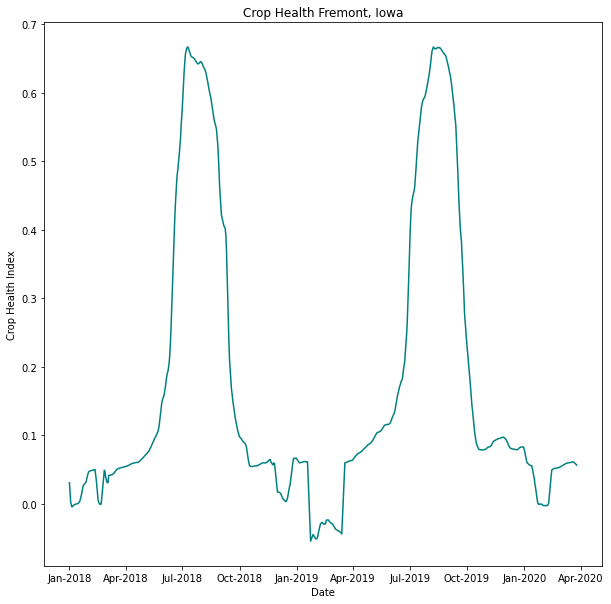

In [6]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot("metric_date", 'TELLUSCHIN', data=crop_health, color='teal')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Crop Health Index",
       title="Crop Health Fremont, Iowa"
      )
# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)

plt.show()

### Outcomes - Example using the 'metrics' Endpoint

In [7]:
country_iso = 'BRA'
start_date = '2019-12-01'
end_date = '2020-03-31'
crop = 'corn'
geo_level = 'level_1'
in_yield = 'INBRCRM1WK'


### API Request

In [8]:
outcomes_request = requests.get('https://api.kernel.telluslabs.com/api/v1/metrics/', 
                           params={'country_iso': country_iso,
                                   'geo_level': geo_level,                      
                                   'start_date': start_date,
                                   'end_date': end_date,
                                   'crop': crop,
                                   'metric_code': in_yield,
                                   'api_key': api_key},
                           headers={'Accept': 'text/csv'})

### Check which data are returned

In [9]:
# outcomes_request.json()['result']
indigo_yield = pd.read_csv(pd.compat.StringIO(outcomes_request.text), sep=",")
indigo_yield['metric_date']= pd.to_datetime(indigo_yield['metric_date']) 
indigo_yield.head(10)

,crop,country_iso,geo_level,geo_id,geo_display_name,metric_date,INBRCRM1WK
0,corn,BRA,level_1,0,NaN,2019-12-10,5.51465
1,corn,BRA,level_1,0,NaN,2019-12-17,5.51465
2,corn,BRA,level_1,0,NaN,2019-12-24,5.51465
3,corn,BRA,level_1,0,NaN,2019-12-31,5.49758
4,corn,BRA,level_1,0,NaN,2020-01-07,5.38006
5,corn,BRA,level_1,0,NaN,2020-01-14,5.29850
6,corn,BRA,level_1,0,NaN,2020-01-21,5.33937
7,corn,BRA,level_1,0,NaN,2020-01-28,5.36394
8,corn,BRA,level_1,0,NaN,2020-02-04,5.40437
9,corn,BRA,level_1,0,NaN,2020-02-11,5.44539


### Get the Indigo 2020 Yield Model for Brazil Corn

### Plot

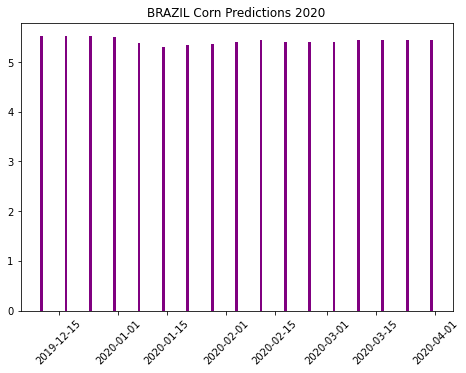

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(indigo_yield['metric_date'],indigo_yield['INBRCRM1WK'], color = 'purple')
       
plt.xticks(rotation=45)
plt.title('BRAZIL Corn Predictions 2020')

plt.show()

## Zambia Corn 

##### Getting data from a specific endpoint and parsing it a little differently as another option.

In [11]:
country_iso = 'ZMB'
start_date = '2010-01-01'
end_date = '2020-04-09'
crop = 'corn'
geo_level = 'level_1'
metric = 'TELLUSCHIN'

In [12]:
crop_health_request = requests.get(' https://api.kernel.telluslabs.com/api/v1/plant_health/', 
                           params={'country_iso': country_iso,
                                   'geo_level': geo_level,                      
                                   'start_date': start_date,
                                   'end_date': end_date,
                                   'crop': crop,
                                   'metric_code': metric,
                                   'api_key': api_key},
                           headers = headers)



In [13]:
crop_health = pd.DataFrame.from_records(crop_health_request.json()['result'][0]['data'][metric], columns=['metric_date', 'CHI'])
crop_health['metric_date']= pd.to_datetime(crop_health['metric_date']) 
crop_health.head(10)

,metric_date,CHI
0,2010-01-01,0.332005
1,2010-01-02,0.333513
2,2010-01-03,0.336008
3,2010-01-04,0.338197
4,2010-01-05,0.341823
5,2010-01-06,0.348819
6,2010-01-07,0.356171
7,2010-01-08,0.362443
8,2010-01-09,0.368968
9,2010-01-10,0.374592


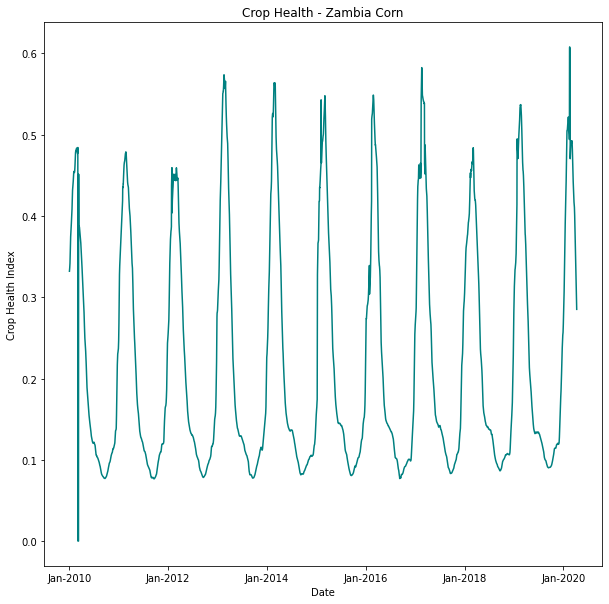

In [14]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot("metric_date", 'CHI', data=crop_health, color='teal')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Crop Health Index",
       title="Crop Health - Zambia Corn"
      )
# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)

plt.show()